In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.11.0'

In [3]:
dataset = pd.read_csv('personagens.csv')

In [4]:
dataset.shape

(293, 7)

In [5]:
dataset.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [6]:
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429134,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


<AxesSubplot:xlabel='classe', ylabel='count'>

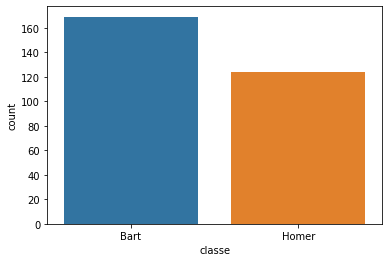

In [7]:
sns.countplot(x = 'classe', data=dataset)

<AxesSubplot:>

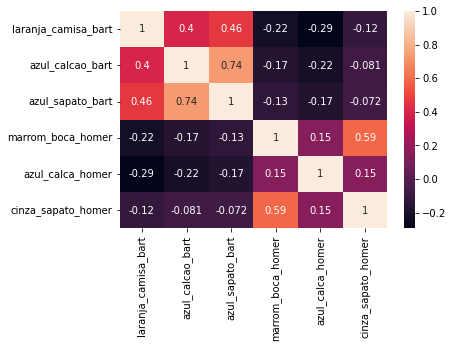

In [8]:
sns.heatmap(dataset.corr(), annot=True)

In [9]:
X = dataset.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [10]:
Y = dataset.iloc[:, 6].values
Y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [11]:
Y = (Y == 'Bart')
Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y, test_size = 0.2)

In [14]:
X_treinamento.shape, Y_treinamento.shape

((234, 6), (234,))

In [15]:
X_teste.shape, Y_teste.shape

((59, 6), (59,))

## **Construção e treinamento**

In [17]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [20]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [28]:
historico = rede_neural.fit(X_treinamento, Y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 0s 14ms/step - loss: 0.2037 - accuracy: 0.8952 - val_loss: 0.2610 - val_accuracy: 0.7917
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2015 - accuracy: 0.8952 - val_loss: 0.2585 - val_accuracy: 0.7917
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.1993 - accuracy: 0.8952 - val_loss: 0.2581 - val_accuracy: 0.7917
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1975 - accuracy: 0.8952 - val_loss: 0.2582 - val_accuracy: 0.7917
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.1957 - accuracy: 0.8952 - val_loss: 0.2570 - val_accuracy: 0.7917
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.1940 - accuracy: 0.8952 - val_loss: 0.2572 - val_accuracy: 0.7917
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.1926 - accuracy: 0.8952 - val_loss: 0.2574 - val_accuracy: 0.7917
Epoch 8/50
7/7 [================

## **Avaliação**

In [29]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

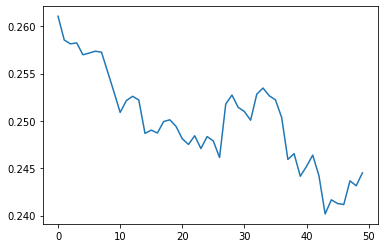

In [30]:
plt.plot(historico.history['val_loss'])

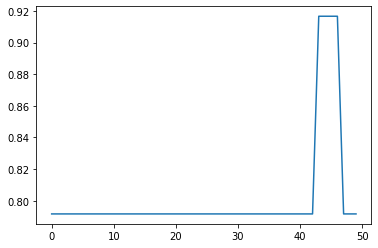

In [31]:
plt.plot(historico.history['val_accuracy'])

In [32]:
previsoes = rede_neural.predict(X_teste)
previsoes

2/2 [==============================] - 0s 4ms/step


array([[9.99972284e-01],
       [4.95285660e-01],
       [8.88470538e-07],
       [9.89250779e-01],
       [9.99795198e-01],
       [9.99961197e-01],
       [9.99897838e-01],
       [9.83409405e-01],
       [4.38767701e-01],
       [4.95251596e-01],
       [4.95366871e-01],
       [5.74120486e-06],
       [4.95433092e-01],
       [4.87693157e-08],
       [4.87466544e-01],
       [4.85499576e-03],
       [2.59367908e-07],
       [9.15746465e-02],
       [9.99966800e-01],
       [5.07212121e-07],
       [9.82839836e-08],
       [4.87033010e-01],
       [4.95426744e-01],
       [4.95515376e-01],
       [9.94595110e-01],
       [2.35826825e-03],
       [4.02283695e-06],
       [9.98761654e-01],
       [4.70750034e-01],
       [4.09447663e-02],
       [4.45267856e-01],
       [9.99941885e-01],
       [9.95781422e-01],
       [4.95445341e-01],
       [3.44711793e-06],
       [1.57277566e-06],
       [9.99997556e-01],
       [4.95058119e-01],
       [1.42722838e-02],
       [9.04466172e-12],


In [33]:
previsoes = (previsoes > 0.5)
previsoes

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True]])

In [34]:
Y_teste

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False,  True,  True])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, Y_teste)

0.7796610169491526

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste, previsoes)
cm

array([[27,  0],
       [13, 19]])

<AxesSubplot:>

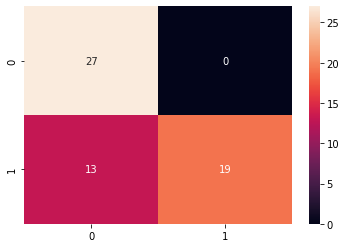

In [43]:
sns.heatmap(cm, annot=True)